In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
#decimal place upto 3

np.set_printoptions(precision=3)

In [10]:
diabetes = pd.read_csv('dataset/diabetes_processed.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [13]:
feature_df = diabetes.drop('Outcome',axis=1)
target_df = diabetes['Outcome']

feature_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [15]:
feature_df.shape

(768, 8)

In [17]:
feature_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.994792,152.815064,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096346,8.886506,97.206638,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-16.568152,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,89.976015,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,32.000000,131.100779,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,189.857469,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
#scale all data to range 0 and 1

scaler = MinMaxScaler(feature_range=(0,1))
rescaled_fe = scaler.fit_transform(feature_df)

In [23]:
rescaled_fe.shape

(768, 8)

In [25]:
rescaled_fe[0:5]

array([[0.353, 0.671, 0.49 , 0.304, 0.273, 0.315, 0.234, 0.483],
       [0.059, 0.265, 0.429, 0.239, 0.101, 0.172, 0.117, 0.167],
       [0.471, 0.897, 0.408, 0.272, 0.333, 0.104, 0.254, 0.183],
       [0.059, 0.29 , 0.429, 0.174, 0.128, 0.202, 0.038, 0.   ],
       [0.   , 0.6  , 0.163, 0.304, 0.214, 0.509, 0.944, 0.2  ]])

In [27]:
#instantiate the rescaled features in the pandas dataframe

rescaled_fe_df = pd.DataFrame(rescaled_fe, columns = feature_df.columns)
rescaled_fe_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493930,0.249943,0.196371,0.291430,0.168179,0.204015
std,0.198210,0.196376,0.123432,0.096592,0.112694,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.123520,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.271739,0.171197,0.282209,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239315,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


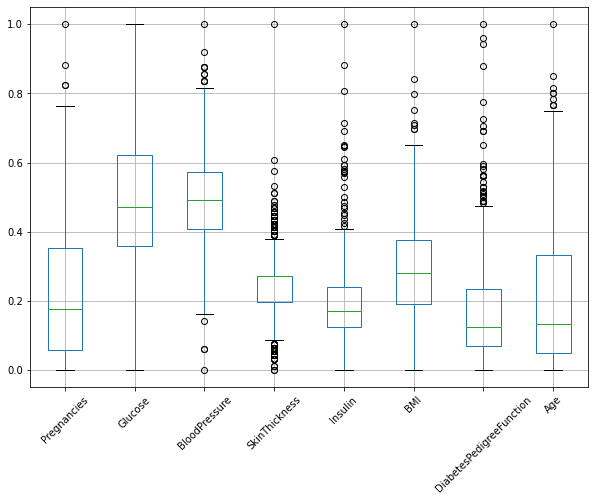

In [29]:
rescaled_fe_df.boxplot(figsize=(10,7), rot=45)
plt.show()

In [31]:
#for standardization

from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler = scaler.fit(feature_df)

standardized_fe = scaler.transform(feature_df)

In [35]:
standardized_fe[0:5]

array([[ 0.64 ,  0.866, -0.034,  0.564,  0.682,  0.167,  0.468,  1.426],
       [-0.845, -1.205, -0.53 , -0.112, -0.849, -0.852, -0.365, -0.191],
       [ 1.234,  2.017, -0.695,  0.226,  1.212, -1.332,  0.604, -0.106],
       [-0.845, -1.074, -0.53 , -0.788, -0.605, -0.633, -0.921, -1.042],
       [-1.142,  0.504, -2.681,  0.564,  0.156,  1.55 ,  5.485, -0.02 ]])

In [38]:
standardized_fe_df = pd.DataFrame(standardized_fe, columns = feature_df.columns)
standardized_fe_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,4.625929e-18,-4.325244e-16,-1.318390e-16,-2.312965e-18,4.672189e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.004245e+00,-2.589294e+00,-1.743642e+00,-2.074100e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.953060e-01,-5.624310e-01,-6.468694e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-1.675912e-02,2.257935e-01,-2.235283e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.282695e-01,2.257935e-01,3.813170e-01,6.038649e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.102655e+00,7.770228e+00,7.135692e+00,5.042883e+00,5.883565e+00,4.063716e+00


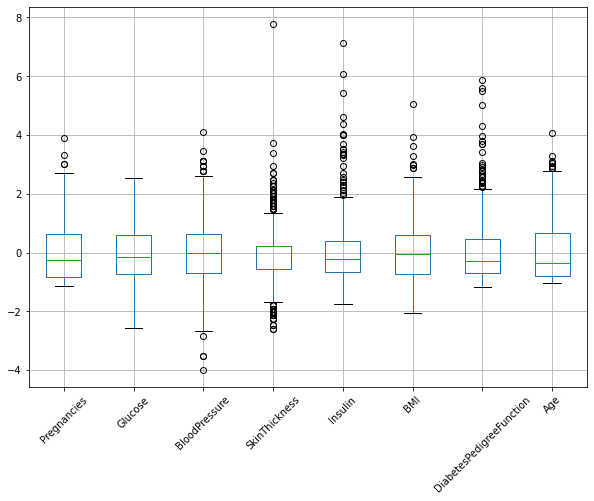

In [40]:
standardized_fe_df.boxplot(figsize=(10,7), rot=45)
plt.show()

In [42]:
# using normalization for feature scaling

from sklearn.preprocessing import Normalizer

In [47]:
normalizer = Normalizer(norm = 'l1')

norm_fe = normalizer.fit_transform(feature_df)

In [49]:
l1_norm_fe = pd.DataFrame(norm_fe, columns = feature_df.columns)

In [51]:
l1_norm_fe.iloc[0]

Pregnancies                 0.010633
Glucose                     0.262293
BloodPressure               0.127602
SkinThickness               0.062029
Insulin                     0.388172
BMI                         0.059548
DiabetesPedigreeFunction    0.001111
Age                         0.088612
Name: 0, dtype: float64

In [53]:
l1_norm_fe.iloc[0].abs().sum()

1.0

In [55]:
#using l2 normalization

normalizer = Normalizer(norm = 'l2')

norm_fe = normalizer.fit_transform(feature_df)
l2_norm_fe = pd.DataFrame(norm_fe, columns = feature_df.columns)

In [57]:
l2_norm_fe.iloc[0].pow(2)

Pregnancies                 0.000450
Glucose                     0.273965
BloodPressure               0.064839
SkinThickness               0.015322
Insulin                     0.600030
BMI                         0.014121
DiabetesPedigreeFunction    0.000005
Age                         0.031269
Name: 0, dtype: float64

In [59]:
l2_norm_fe.iloc[0].pow(2).sum()

0.9999999999999998

In [62]:
# using max normalization

normalizer = Normalizer(norm = 'max')

norm_fe = normalizer.fit_transform(feature_df)
max_norm_fe = pd.DataFrame(norm_fe, columns = feature_df.columns)

In [64]:
max_norm_fe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027394,0.675711,0.328724,0.159797,1.000000,0.153405,0.002863,0.228281
1,0.011765,1.000000,0.776471,0.341176,0.827548,0.312941,0.004129,0.364706
2,0.029567,0.676342,0.236535,0.118267,1.000000,0.086113,0.002484,0.118267
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


In [66]:
# descritize numeric features to be in categorical form

from sklearn.preprocessing import Binarizer

In [70]:
binarizer = Binarizer(threshold = float((feature_df[['Pregnancies']]).mean()))
binarized_fe = binarizer.fit_transform(feature_df[['Pregnancies']])

binarized_fe[0:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [73]:
for i in range(1, feature_df.shape[1]):
    scaler = Binarizer(threshold = float((feature_df[[feature_df.columns[i]]]).mean())).\
    fit(feature_df[[feature_df.columns[i]]])
    
    new_bin_fe = scaler.transform(feature_df[[feature_df.columns[i]]])
    
    binarized_fe = np.concatenate((binarized_fe, new_bin_fe),axis=1)

binarized_fe[0:10]

array([[1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        1., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,

In [75]:
# using logistic regression for classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
def build_model(X, Y, test_frac):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_frac)
    
    model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print("test score: ", accuracy_score(y_test, y_pred))

In [84]:
build_model(rescaled_fe, target_df, 0.2)

test score:  0.7532467532467533


In [86]:
build_model(standardized_fe, target_df, 0.2)

test score:  0.7662337662337663


In [90]:
build_model(norm_fe, target_df, 0.2)

test score:  0.6883116883116883


In [92]:
build_model(binarized_fe, target_df, 0.2)

test score:  0.7467532467532467


In [94]:
build_model(max_norm_fe, target_df, 0.2)

test score:  0.5974025974025974


In [96]:
build_model(l2_norm_fe, target_df, 0.2)

test score:  0.6428571428571429
